<h1 style="text-align: center;"> This notebook provides functions for drawing spectra and Figures 2 and 11 from the paper
    <h2 style="text-align: center;"> <b>"Impact of Pre- and Post-Processing Steps for Supervised Classification of Colorectal Cancer in Hyperspectral Images" </b> </h2>
</h1>
<h3> It contains code for: <br>
   - drawing spectra before and after pre-processing (scaling) <br>
   - Figures 2, 11 <br>
   - Some minor experiments   
    
</h3>
<h3>
    Paper: <a href='https://www.mdpi.com/2233040'>https://www.mdpi.com/2233040 </a> <br>
    Documentation: <a href='https://git.iccas.de/MaktabiM/hsi-experiments/-/wikis/Post-processing'>https://git.iccas.de/MaktabiM/hsi-experiments/-/wikis/Post-processing </a> <br> <br>
    
    The notebook is divided into sections for simplicity
</h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

<h1 style="text-align: center;"> Load and scale spectra (better to use 16-32 Gb memory and GPU during a set up of your server) </h1>

In [19]:
from spectraUtil import SpectraUtil

In [20]:
util = SpectraUtil('/work/users/mi186veva/data_1d/raw')
X_full, y_full = util.get_full_X_y()
print(X_full.shape, y_full.shape)

X, y = util.get_part_of_X_y(X_full, y_full, each_Xth_sample=10000)
print(X.shape, y.shape)

X_normalized, X_standard_scaled_T = util.get_scaled_X(X)
healthy, ill = util.get_healthy_and_ill_indexes(y)

NormalizerScaler is created
StandardScalerTransposed is created
(5791157, 92) (5791157,)
(580, 92) (580,)


<h1 style="text-align: center;"> Figure 2. Effects of pre-processing on spectra </h1>

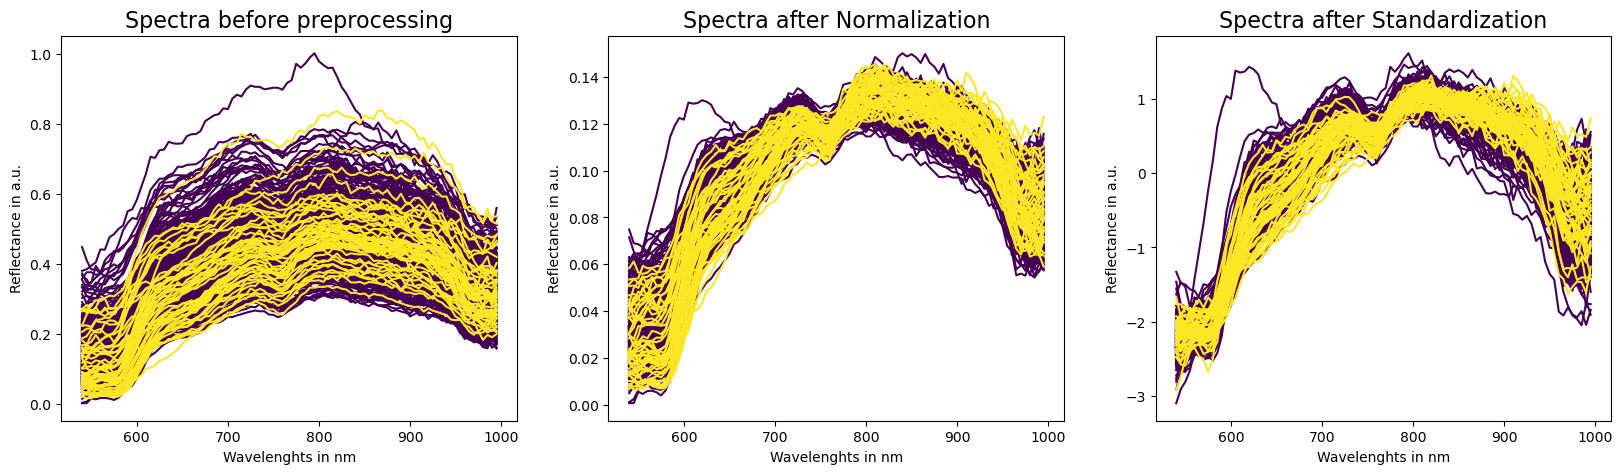

In [21]:
x_labels = (np.arange(X.shape[-1]) * 5) + 540

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

#plt.plot(X.T)
ax1.plot(x_labels, X[healthy].T, c='#440154FF')
ax1.plot(x_labels, X[ill].T, c='#FDE725FF')
ax1.set_title('Spectra before preprocessing', fontdict={'fontsize': 16})#, y=0.15)
ax1.set_ylabel('Reflectance in a.u.')
ax1.set_xlabel('Wavelenghts in nm')
#ax1.set_ylim(ymax=2.1)


#plt.plot(X_normalized.T)
ax2.plot(x_labels, X_normalized[healthy].T, c='#440154FF')
ax2.plot(x_labels, X_normalized[ill].T, c='#FDE725FF')
ax2.set_title('Spectra after Normalization', fontdict={'fontsize': 16})
ax2.set_ylabel('Reflectance in a.u.')
ax2.set_xlabel('Wavelenghts in nm')
#ax2.set_ylim(ymax=2.1)


#plt.plot(X_standard_scaled_T.T)
ax3.plot(x_labels, X_standard_scaled_T[healthy].T, c='#440154FF')
ax3.plot(x_labels, X_standard_scaled_T[ill].T, c='#FDE725FF')
ax3.set_title('Spectra after Standardization', fontdict={'fontsize': 16})
ax3.set_ylabel('Reflectance in a.u.')
ax3.set_xlabel('Wavelenghts in nm')
#ax3.set_ylim(ymax=2.1)

plt.savefig(os.path.join('post-processing-paper', 'Figure2.png'))
plt.show()

<h1 style="text-align: center;"> Figure 11. Probability distributions of the features</h1>

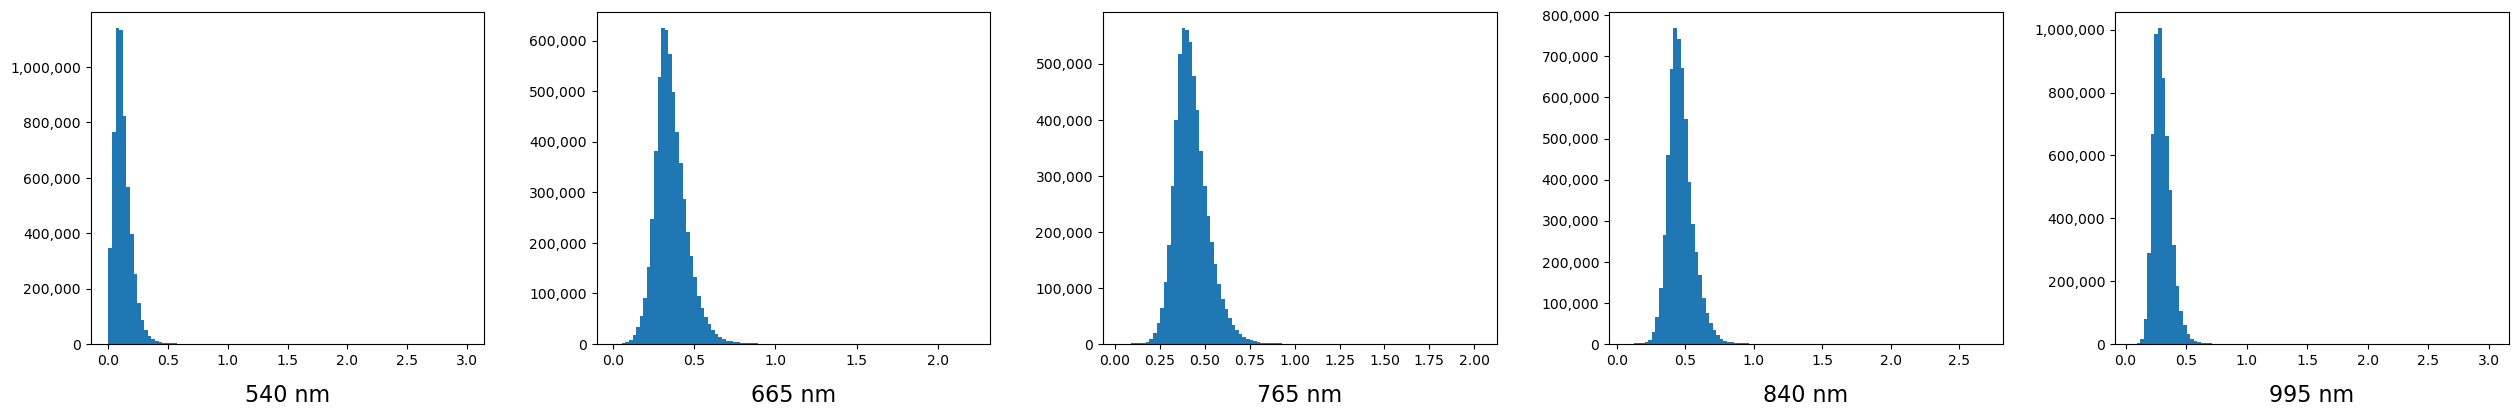

In [22]:
import matplotlib

features = [0, 25, 45, 60 ,91]

fig, ax = plt.subplots(1, len(features), figsize=(26, 5))
fig.tight_layout(pad=5.0)

for f_i, feature in enumerate(features):
    ax[f_i].hist(X_full[:, feature], bins=100)
    ax[f_i].set_title(f'{(feature * 5) +540} nm', fontdict={'fontsize': 16}, y=-0.2)
    ax[f_i].get_yaxis().set_major_formatter( matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) 
    
plt.savefig(os.path.join('post-processing-paper', 'Figure 11.png'))
plt.show()

<h1 style="text-align: center;"> Other </h1>

/work/users/mi186veva/data_3d/l2_norm/*.npz
/work/users/mi186veva/data_3d/l2_norm/2019_07_15_11_33_28_.npz


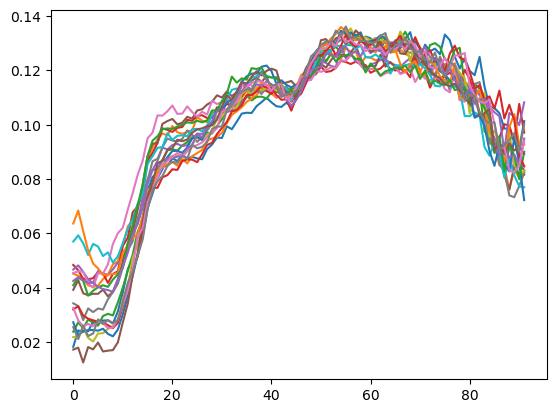

/work/users/mi186veva/data_3d/svn/*.npz
/work/users/mi186veva/data_3d/svn/2019_07_15_11_33_28_.npz


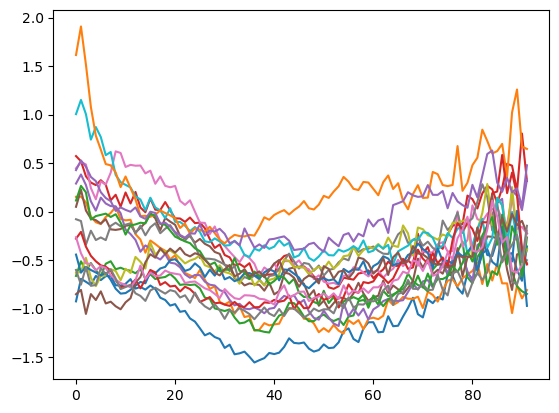

/work/users/mi186veva/data_3d/svn_T/*.npz
/work/users/mi186veva/data_3d/svn_T/2019_07_15_11_33_28_.npz


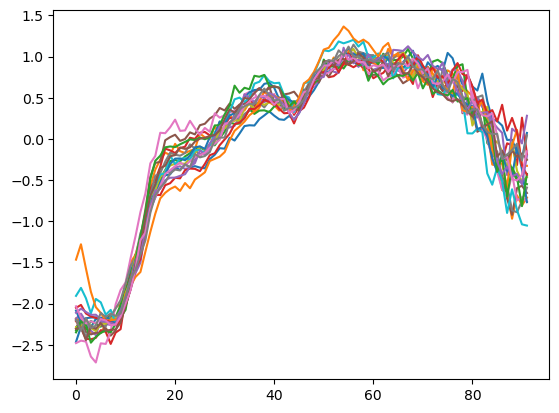

In [23]:
# check .npz archives
from glob import glob

for folder in ['l2_norm', 'svn', 'svn_T']:
    print(os.path.join('/work/users/mi186veva/data_3d/', folder, '*.npz'))
    path = sorted(glob(os.path.join('/work/users/mi186veva/data_3d/', folder, '*.npz')))[1]
    print(path)
    X = np.load(path)['X'][:, 2, 2, ...][::1000]
    
    plt.plot(X.T)
    plt.show()
    

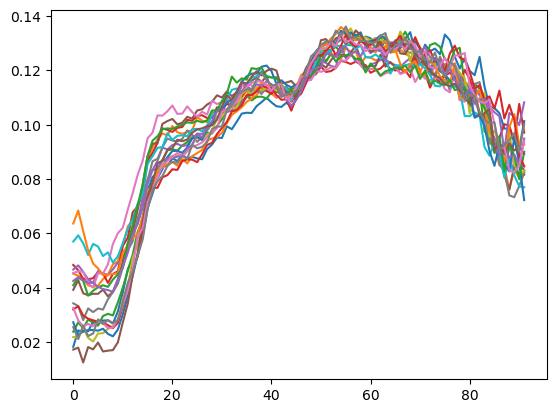

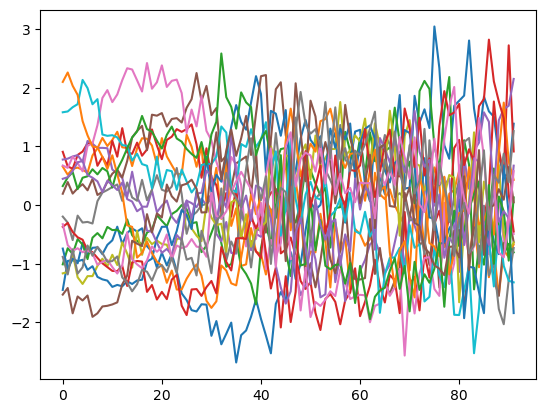

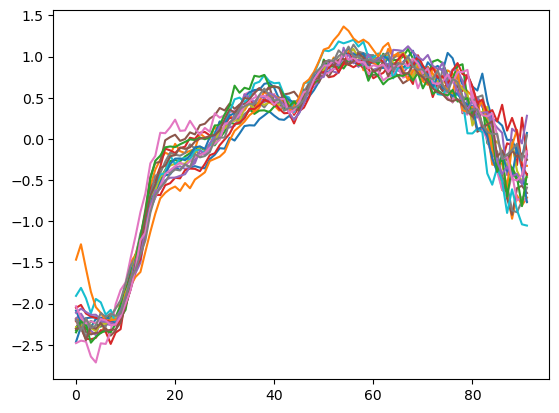

In [24]:
#play with l2_norm
from sklearn import preprocessing

X_l2 = np.load('/work/users/mi186veva/data_3d/l2_norm/2019_07_15_11_33_28_.npz')["X"][::1000, 2, 2, :]
plt.plot(X_l2.T)
plt.show()

X_l2_svn = preprocessing.StandardScaler().fit_transform(X_l2)
plt.plot(X_l2_svn.T)
plt.show()

X_l2_svn_T = preprocessing.StandardScaler().fit_transform(X_l2.T)
plt.plot(X_l2_svn_T)
plt.show()

/home/sc.uni-leipzig.de/mi186veva/.local/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


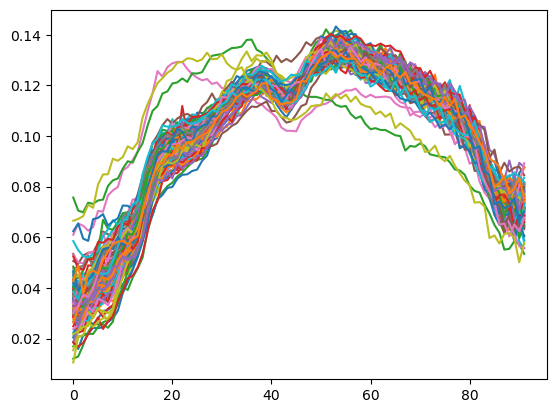

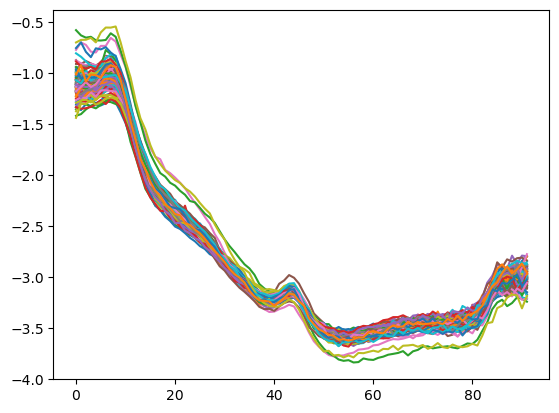

In [25]:
#play with raw
import pickle 

raw = np.load('/work/users/mi186veva/data_3d/raw_3d/2020_03_27_16_57_07_.npz')['X'][:, 2, 2, :]
scaler = pickle.load(open('/work/users/mi186veva/data_3d/svn/scaler.scaler', 'rb'))

#X_ = scaler.fit_transform(raw.T).T
X_ = scaler.transform(raw)

plt.plot(raw[::1000].T)
plt.show()

plt.plot(X_[::1000].T)
plt.show()

<h1 style="text-align: center;"> Check preprocessor scaling </h1>

(206, 92)
(206, 92)
(206, 92)
Raw spectra


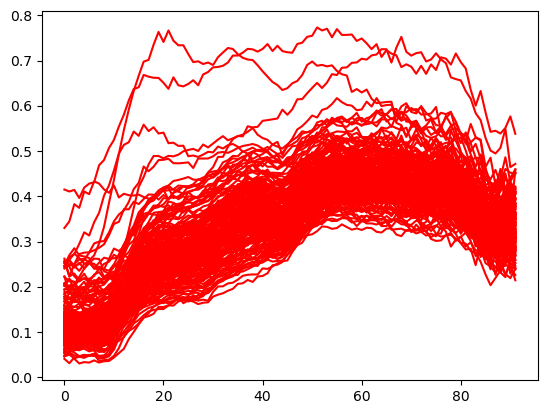

Normalized spectra


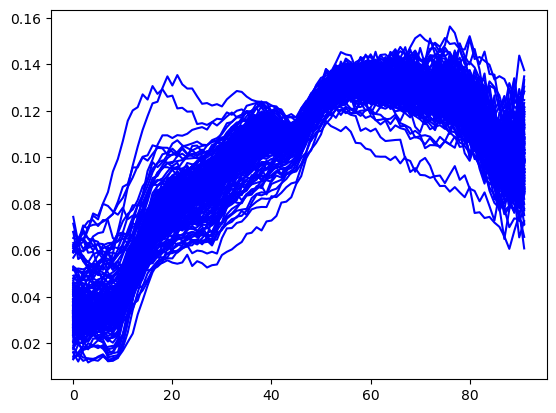

Standard scaler


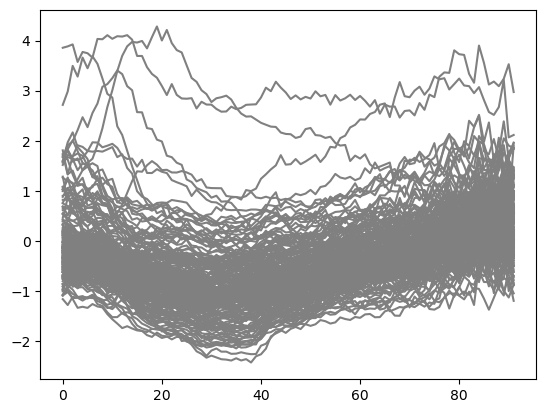

Standard transposed scaler


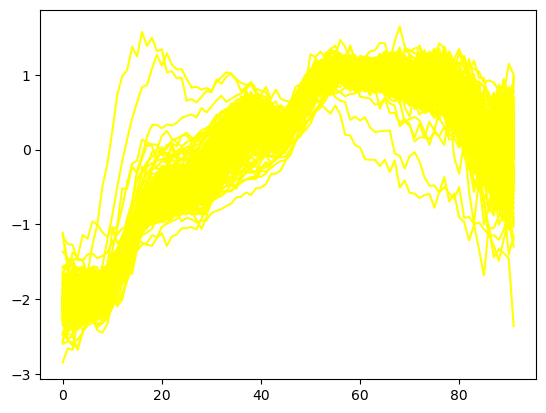

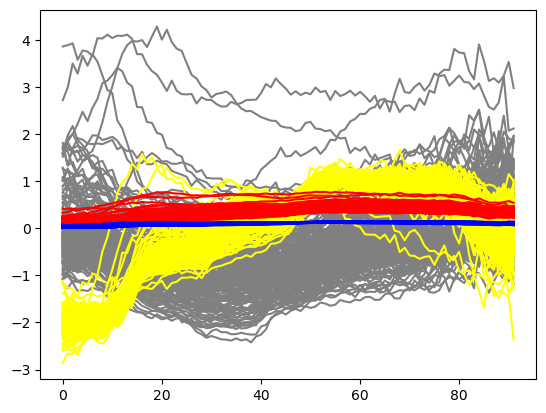

In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np

preffix = '/work/users/mi186veva/data_3d'
patient = '2019_07_12_11_15_49'

k = 100
raw_data = np.load(os.path.join(preffix, '3x3', patient + '.npz'))['X'][::k, 1, 1]
l2Norm_data = np.load(os.path.join(preffix, 'norm_3x3_new', patient + '.npz'))['X'][::k, 1, 1]
svn_data = np.load(os.path.join(preffix, 'svn_3x3', patient + '.npz'))['X'][::k, 1, 1]
svn_T_data = np.load(os.path.join(preffix, 'svn_T_3x3', patient + '.npz'))['X'][::k, 1, 1]

print(raw_data.shape)
print(l2Norm_data.shape)
print(svn_data.shape)


print('Raw spectra')
plt.plot(raw_data.T, c='red')
plt.show()
print('Normalized spectra')
plt.plot(l2Norm_data.T, c='blue')
plt.show()
print('Standard scaler')
plt.plot(svn_data.T, c='gray')
plt.show()
print('Standard transposed scaler')
plt.plot(svn_T_data.T, c='yellow')
plt.show()

plt.plot(svn_data.T, c='gray')
plt.plot(svn_T_data.T, c='yellow')
plt.plot(raw_data.T, c='red')
plt.plot(l2Norm_data.T, c='blue')
plt.show()
